In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [30]:
class Synthetic_Time_Series:
    
    def __init__(self, time, series=None):
        assert len(time)>0
        self.time = time
        self.series = series
        
    def plot(self, start=0, format='-', end=None, label=None):
        plt.plot(time[start:end], series[start:end], format, label=label)
        plt.xlabel("Time")
        plt.ylabel("Value")
        if label:
            plt.legend(fontsize=14)
        plt.grid(True)
    
    def build_series(self, baseline, slope, period=1, amplitude=1, noise_level=1, seed=0):
        
        ''' Repeats seasonal pattern for each time period '''
        def seasonality(self, period, amplitude):
            def seasonal_pattern(season_time):
                return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))
            
            season_time = (time % period) / period
            return amplitude * seasonal_pattern(season_time)
    
        ''' Add noise '''
        def noise(self, noise_level=1, seed=None):
            rnd = np.random.RandomState(seed)
            return rnd.randn(len(time)) * noise_level
    
        self.series = baseline + slope*time + seasonality(time, period=period, amplitude=amplitude)
        self.series += noise(time, noise_level, seed)
    
    

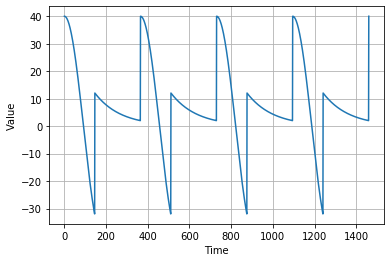

In [17]:
# test
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10 
baseline = 10
amplitude = 40
period = 4
slope = 0.01
noise_level = 2
seed = 42

time_series = Synthetic_Time_Series(time)
time_series.build_series(baseline, slope, period, amplitude, noise_level, seed)
time_series.plot()

In [37]:
class Forecast:
    
    def __init__(self, series, split):
        self.train_series = Synthetic_Time_Series(series.time[:split], series.series[:split])
        self.test_series = Synthetic_Time_Series(series.time[split:], series.series[split:])
        self.pred_series = Synthetic_Time_Series(series.time[split:])
        self.split = split
        
    def plot(self):        
        plt.plot(self.train_series.time, self.train_series.series)
        plt.plot(self.test_series.time, self.test_series.series)
        plt.plot(self.pred_series.time, self.pred_series.series)
        plt.xlabel("Time")
        plt.ylabel("Value")
        if label:
            plt.legend(fontsize=14)
        plt.grid(True)
        
        print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
        
    def naive(self):
        self.pred_series.series = self.test_series.series[self.split - 1:-1]
    
    def moving_avg(self, window_size=1):
        for time in range(len(series) - window_size):
            forecast.append(series[time:time + window_size].mean())
        return np.array(forecast)
    
    def moving_avg_diff(self):
        return
    
    def moving_avg_double_diff(self):
        return
    

ValueError: x and y must have same first dimension, but have shapes (461,) and (0,)

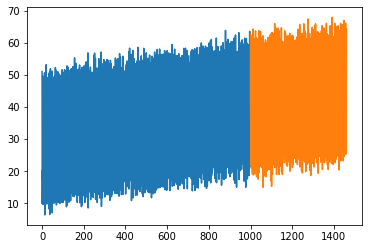

In [38]:
# test

forecast = Forecast(time_series,1000)

forecast.naive()
forecast.plot()